###  <font color='green' size=5> HW #3: Complete fully reproducible report of visual story (and "Persuasive Statement")
</font> 

**Analytics StoryTelling** <br>
**ANLT 234** <br>
**November 17, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

#### <font color='black' size=3> _“Science and religion are not at odds. Science is simply too young to understand!”_  </font>  
<font color='black' size=3> Dan Brawn </font>

##  <font color='blue' size=4> Introduction  </font>

Religion is one of the controversial subjects today and it could affect economics, politics, social relations and other aspects of countries, so descriptive analytics about its current status and a predictive or even prescriptive analytics would help principals to make more efficient decisions. Although religion is a personal subject, religious people usually would do their best to have a life based on guidelines from religious leaders. <br>
For a jump to start the demographic analysis of religions, we selected dataset of World Religion Project (WRP). This dataset consists of three files. The first one shows global distribution of religions on the earth. The second one shows desired parameters at different regions of Asia, Middle East, Africa, Europe, and West Hemisphere. The last one describes demographic details for all countries in different regions. <br>
We try to catch trends from each dataset to extract valuable insight from them.


##  <font color='blue' size=4> Statement  </font>

In this report, we would try to analyze the trend of adherence to religions in all areas of the world from 1945 until now. There is a lot of discussion about the correlation of this adherence with technology (especially the Internet) because some people believe this adherence is declining due to the empowering of communication technology and social media. We would evaluate this belief with a detailed inspection of the mentioned datasets and would confirm that this opinion is not right and _**Despite the unprecedent progress and unparalleled discoveries in science and technology, today most people still hold a strong faith in religion.**_


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
from scipy import interpolate
from scipy.optimize import curve_fit
from wordcloud import WordCloud, STOPWORDS

from IPython.display import display
pd.options.display.max_columns = None

from IPython.display import HTML

%matplotlib inline


In [32]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [33]:
# Load in the .csv files as three separate dataframes
Global = pd.read_csv('global.csv') # Put to caps or else name clash
national = pd.read_csv('national.csv')
regional = pd.read_csv('regional.csv')

##  <font color='blue' size=4> Global Analysis  </font>

The first dataset about global information is as below. It has information for periods of 5 years from 1945 to 2010. It shows worldwide population and percentage for different religions and their subsidiaries. Three main Abrahamian religions are Christianity, Islam, and Judaism. Each of them has some branches that some of them are very popular and others not. For example in Islam, 'Sunni' and 'Shi'a' are popular, but the majority of people do not know 'Alawite'. Already, it has statistical information of non-Abrahamian religions same to Buddhism, Hinduism, and Shinto. There are some items with zero values that some of them are not zero and they mean missing values. We could find these values with interpolation or extrapolation, but they do not have a considerable contribution to our analysis. A lot of missing values are for early years due to the complexity of census in those years.    

In [34]:
Global

,year,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,judaism_reform,judaism_other,judaism_all,islam_sunni,islam_shi’a,islam_ibadhi,islam_nationofislam,islam_alawite,islam_ahmadiyya,islam_other,islam_all,buddhism_mahayana,buddhism_theravada,buddhism_other,buddhism_all,zoroastrianism_all,hinduism_all,sikhism_all,shinto_all,baha’i_all,taoism_all,jainism_all,confucianism_all,syncretism_all,animism_all,noreligion_all,otherreligion_all,religion_all,population,world_population,protestant_percent,romancatholic_percent,easternorthodox_percent,anglican_percent,otherchristianity_percent,christianity_percent,orthodox_percent,conservative_percent,reform_percent,otherjudaism_percent,judaism_percent,sunni_percent,shi’a_percent,ibadhi_percent,nationofislam_percent,alawite_percent,ahmadiyya_percent,otherislam_percent,islam_percent,mahayana_percent,theravada_percent,otherbuddhism_percent,buddhism_percent,zoroastrianism_percent,hinduism_percent,sikhism_percent,shinto_percent,baha’i_percent,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent
0,1945,160887585,391332035,98501171,36955033,13674466,701350290,856827,1426350,1929388,7796835,12009400,49050320,19436742,0,0,0,0,62273219,130760281,0,0,116237936,116237936,12710,5389197,20809,55228775,15495,120950,181,0,428660117,33210080,153486530,9856926,1636502751,1617000000,2250000000,0.1001,0.2434,0.0613,0.0230,0.0085,0.4362,0.0005,0.0009,0.0012,0.0048,0.0075,0.0305,0.0121,0.0000,0,0.0000,0.0000,0.0387,0.0813,0.0000,0.0000,0.0723,0.0723,0.0000,0.0034,0.0000,0.0343,0.0000,0.0001,0.0000,0.0000,0.2666,0.0207,0.0955,0.0061,1.012061,0.718667
1,1950,133301043,401935856,106610911,38307544,16324768,696480122,2204231,1860297,2528641,7105125,13698294,56921304,20944082,0,0,387994,0,215867687,294121067,0,14031137,144980765,159011902,119462,301349500,5932557,65452839,638739,921828,1817254,2646410,431942094,88853880,192925316,12145951,2255911264,2231000000,2780296616,0.0600,0.1810,0.0480,0.0173,0.0074,0.3136,0.0010,0.0008,0.0011,0.0032,0.0062,0.0256,0.0094,0.0000,0,0.0002,0.0000,0.0972,0.1325,0.0000,0.0063,0.0653,0.0716,0.0001,0.1357,0.0027,0.0295,0.0003,0.0004,0.0008,0.0012,0.1945,0.0400,0.0869,0.0055,1.011166,0.802432
2,1955,189347338,474378130,111661338,38177572,22437724,836002102,2496432,1653007,2225241,6611524,12986204,78882540,24256503,0,0,445582,0,240487382,344072007,0,33522360,145861839,179384199,140762,328704605,6407617,68145114,761302,1182738,1620662,2956319,385702150,93710944,304128449,21379050,2565905174,2536000000,3039433944,0.0747,0.1871,0.0440,0.0151,0.0088,0.3297,0.0010,0.0007,0.0009,0.0026,0.0051,0.0311,0.0096,0.0000,0,0.0002,0.0000,0.0948,0.1357,0.0000,0.0132,0.0575,0.0707,0.0001,0.1296,0.0025,0.0269,0.0003,0.0005,0.0006,0.0012,0.1521,0.0370,0.1199,0.0084,1.011792,0.834366
3,1960,220293770,541957872,118268109,41846700,44601144,966967595,2818847,1716903,2300405,6892701,13728856,104325384,27174803,0,0,521848,0,303101053,435123088,0,16766250,183672909,200439159,170443,361169167,8088138,71357167,1278349,1357348,2031760,3593958,325016083,135768801,434629671,18904435,2960719583,2921000000,3345409879,0.0754,0.1856,0.0405,0.0143,0.0153,0.3311,0.0010,0.0006,0.0008,0.0024,0.0047,0.0357,0.0093,0.0000,0,0.0002,0.0000,0.1038,0.1490,0.0000,0.0057,0.0629,0.0686,0.0001,0.1237,0.0028,0.0244,0.0004,0.0005,0.0007,0.0012,0.1113,0.0465,0.1488,0.0065,1.013598,0.873137
4,1965,234437703,614115021,125954494,45086639,55119929,1074713786,3295632,1760345,2348076,6849626,14253679,129192812,17097714,40000,0,598115,0,367705416,514634057,0,18305680,194287704,212593384,148944,397863182,8895685,74982591,1658891,1704647,2341748,4441376,358844822,160893706,474097850,41159669,3302068346,3280000000,3706601448,0.0715,0.1873,0.0384,0.0137,0.0168,0.3277,0.0010,0.0005,0.0007,0.0021,0.0043,0.0394,0.0052,0.0

In [35]:

#def func(x, a, b):
   # return a*x+ b;

#x = np.arange(5, 7)
#y=np.array(Global['islam_ibadhi'][5:7])
#popt, pcov = curve_fit(func, x, y)

#Global.loc[0:4,'islam_ibadhi']=pd.Series(func(np.arange(0,5) ,popt[0],popt[1])).astype(int)


#x = np.arange(1, 3)
#y=np.array(Global['islam_alawite'][1:3])
#popt, pcov = curve_fit(func, x, y)

#Global.loc[0,'islam_alawite']=int(func(np.array([0]) ,popt[0],popt[1]))

A word cloud of main religions has been generated as below. It is evident that the font size of each faith is proportional to its population on the earth. You could see Christianity is the most popular religion in the world and Islam is the next. For example, it is clear from word cloud that among subsidiaries of Christianity, Protestantism and Catholicism are more popular than other branches of Christianity or Sunni is the most popular branch of Islam. 

(-0.5, 399.5, 199.5, -0.5)

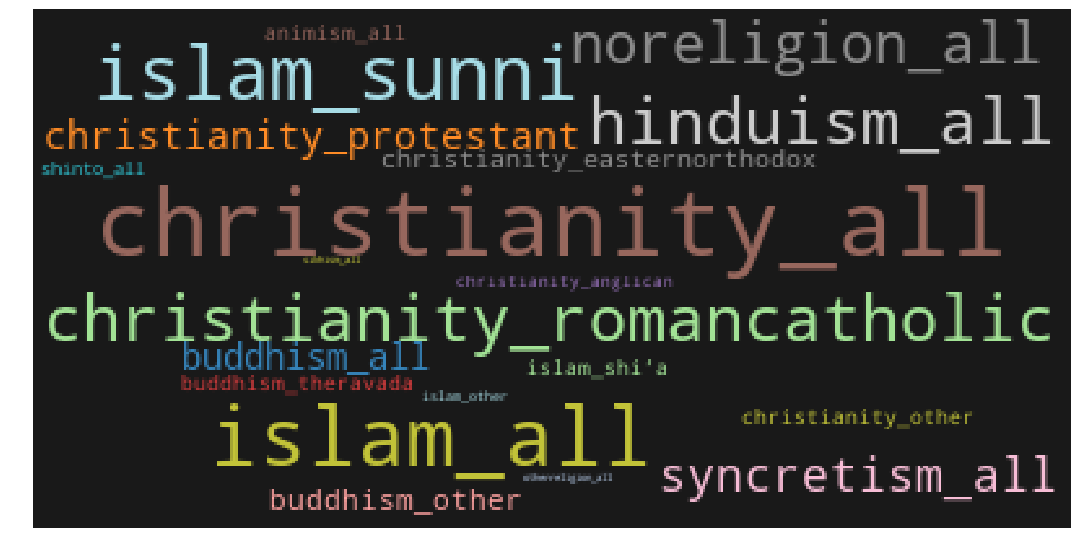

In [36]:
religions=[column for column in Global.columns if not(column == 'year' or column == 'religion_all' \
                                                      or column.endswith('population') or column.endswith('percent'))]
d={}

for religion in religions:
    d[religion] = Global.loc[13 , religion]
plt.figure(figsize=(25,21))
plt.subplot(211)


wordcloud = WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.axis('off')

Following figure shows population of each religion in the world from 1945 to 2010. It confirms that Christianity is the most popular religion in the world after it we have islam, hinduism, buddhism and syncretism. It shows that population of all religions are increasing in the world.Additionally, it confirms that the population of people without religion is increasing too. One crucial fact that must be considered is the significant increase of population of the world, so it's better to see the percentage of each religion for all decades to look at the trends.

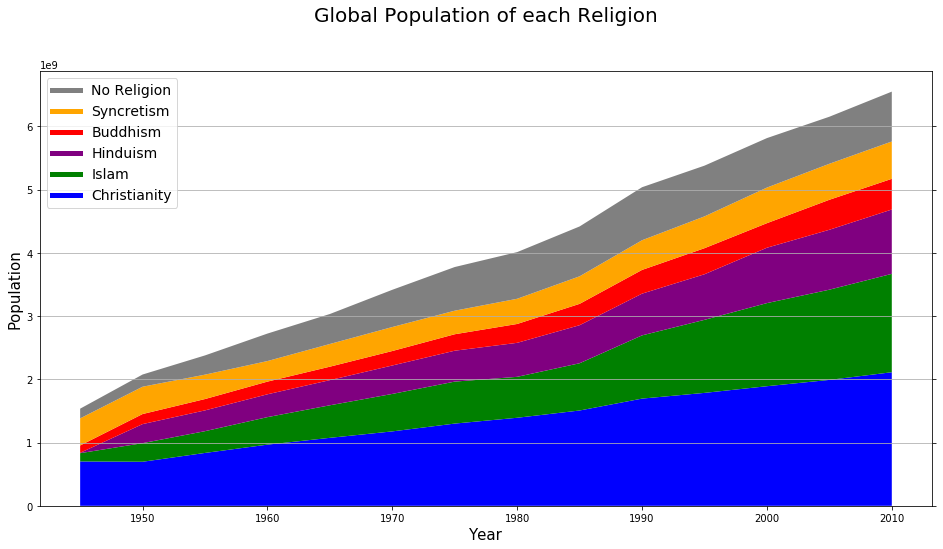

In [37]:
plt.figure(figsize=(16,8))
ax=plt.gca()

plt.plot([],[],color='gray', label='No Religion', linewidth=5)
plt.plot([],[],color='orange', label='Syncretism', linewidth=5)
plt.plot([],[],color='red', label='Buddhism', linewidth=5)
plt.plot([],[],color='purple', label='Hinduism', linewidth=5)
plt.plot([],[],color='green', label='Islam', linewidth=5)
plt.plot([],[],color='blue', label='Christianity', linewidth=5)

plt.stackplot(Global['year'],Global['christianity_all'], Global['islam_all'] , \
              Global['hinduism_all'], Global['buddhism_all'], Global['syncretism_all'], Global['noreligion_all'],\
              colors=['blue','green','purple','red','orange','gray'])
plt.title('Global Population of each Religion',y=1.1 ,fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Population", fontsize = 15)
plt.legend(loc='upper left' ,fontsize= 14)

ax.yaxis.set_ticks_position('both')
plt.grid(axis='y')

plt.show()

Following diagram shows the distribution of religions in all inspected decades.  It shows a tiny percentage of Hinduists in early times, but it is because of lack of information from those decades. Maybe it would be better to consider information after 1950 because trends are very smooth in all decades after 1950. It confirms Islam is the most growing religion in the world. The primary cause of this subject could be the young age and high fertility rate of Muslims. There is no significant change in percentages of other religions except Islam, and it means the tendency of people to religions is not declining at all. There is an exciting trend in the population of Non-religious people that shows an increase from 1960 to 1990, but it is decreasing again after 1990. Maybe its primary cause is the inclination of people to communism after world war II due to empowering of main communist countries same to China and the Soviet Union, but it declined after the collapse of Soviet Union.

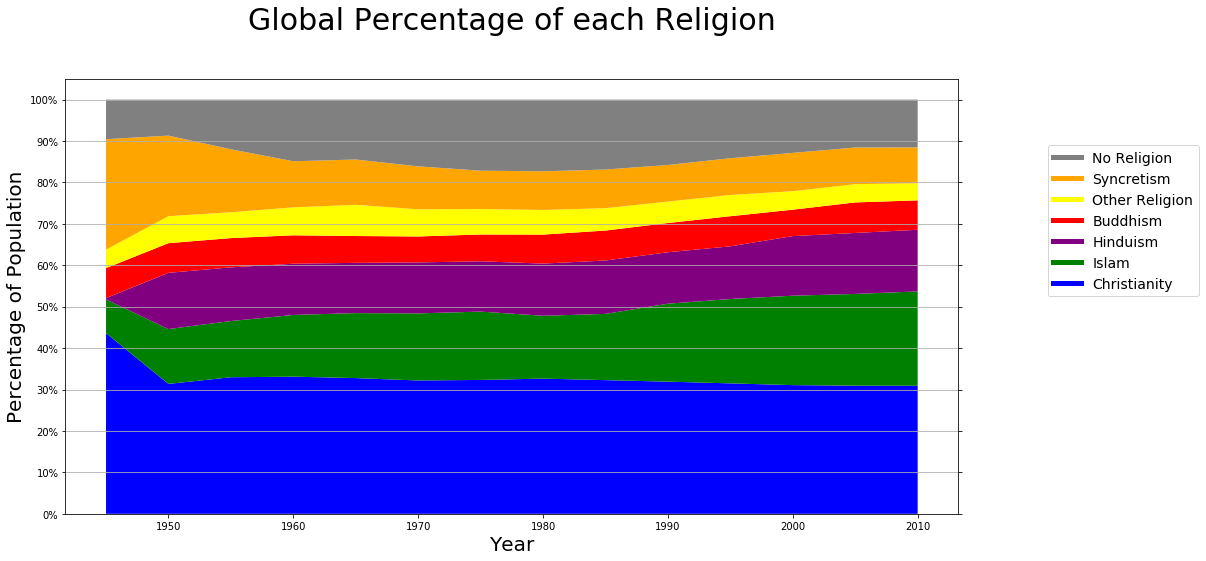

In [38]:
plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot([],[],color='gray', label='No Religion', linewidth=5)
plt.plot([],[],color='orange', label='Syncretism', linewidth=5)
plt.plot([],[],color='yellow', label='Other Religion', linewidth=5)
plt.plot([],[],color='red', label='Buddhism', linewidth=5)
plt.plot([],[],color='purple', label='Hinduism', linewidth=5)
plt.plot([],[],color='green', label='Islam', linewidth=5)
plt.plot([],[],color='blue', label='Christianity', linewidth=5)

other_religion=1-Global['christianity_percent']-Global['islam_percent']-Global['hinduism_percent']-\
                  Global['buddhism_percent']-Global['syncretism_percent']-Global['noreligion_percent']


plt.stackplot(Global['year'],100*Global['christianity_percent'], 100*Global['islam_percent'] ,  \
              100*Global['hinduism_percent'], 100*Global['buddhism_percent'], 100*other_religion, 
              100*Global['syncretism_percent'], 100*Global['noreligion_percent'] \
              , colors=['blue','green','purple','red','yellow','orange','gray'])
plt.title('Global Percentage of each Religion',y=1.1 ,fontsize = 30)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage of Population", fontsize = 20)
plt.legend(loc=(1.1,.5) ,fontsize= 14)

labels=[str(item)+'%' for item in range(0,110,10) ]
ax.set_yticks(list(np.arange(0,110,10)))
ax.set_yticklabels(labels)
ax.yaxis.set_ticks_position('both')
plt.grid(axis='y')

plt.show()

As you could see in following bar chart, it shows the distribution of different branches of Christianity all of the world. It confirms Catholicism is the most popular subsidiary of Christianity and after that, there are Protestantism, Orthodoxy, Anglicism and other minorities of Christianity. It does not show a significant change in percentages and only Christians have more tendency to minority branches that could be interesting. 

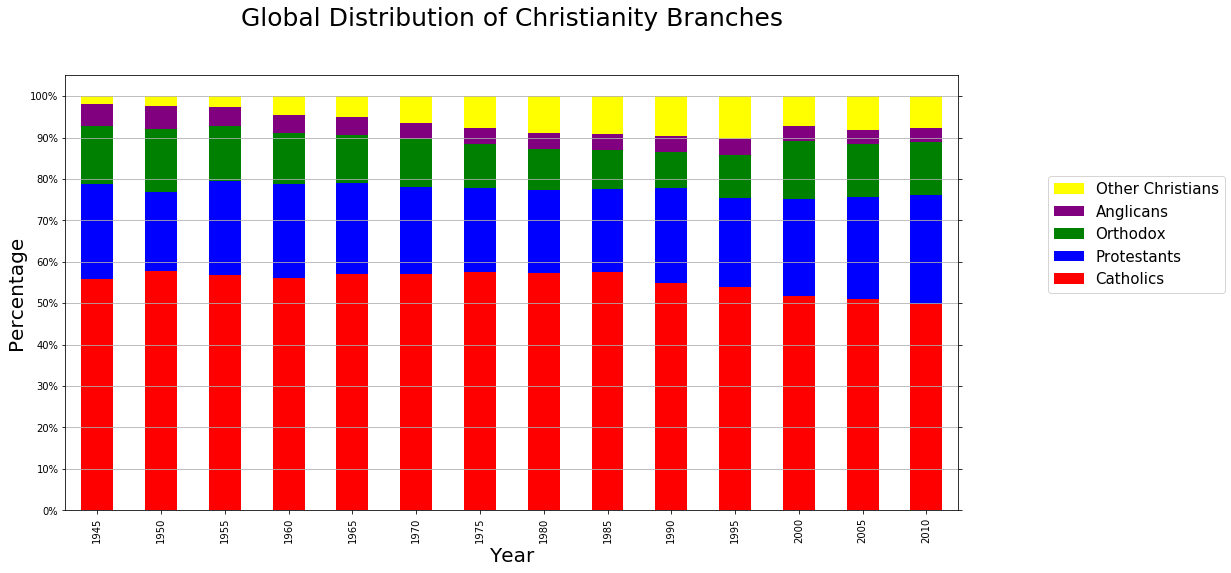

In [39]:
plt.figure(figsize=(16,8))

Global['Protestants'] = 100*Global['christianity_protestant']/ Global['christianity_all']
Global['Catholics'] = 100*Global['christianity_romancatholic']/ Global['christianity_all']
Global['Orthodox'] = 100*Global['christianity_easternorthodox']/ Global['christianity_all']
Global['Anglicans'] = 100*Global['christianity_anglican']/ Global['christianity_all']
Global['Other Christians'] = 100*Global['christianity_other']/ Global['christianity_all']
ax = plt.gca()

Global.plot(x="year", y="Catholics", kind="bar", ax=ax, color="red")
Global.plot(x="year", y="Protestants", kind="bar" , bottom= Global["Catholics"], ax=ax, color='blue')
Global.plot(x="year", y="Orthodox", kind="bar", bottom= Global["Catholics"]+ Global["Protestants"],ax=ax, color="green")
Global.plot(x="year", y="Anglicans", kind="bar", bottom= Global["Catholics"]+ Global["Protestants"]+ \
            Global["Orthodox"],ax=ax, color="purple")
Global.plot(x="year", y="Other Christians", kind="bar",bottom= Global["Catholics"]+ Global["Protestants"]+ \
            Global["Orthodox"]+ Global["Anglicans"] ,ax=ax, color="yellow")

labels=[str(item)+'%' for item in range(0,110,10) ]
ax.set_yticks(list(np.arange(0,110,10)))
ax.set_yticklabels(labels)
ax.yaxis.set_ticks_position('both')
plt.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc=(1.1,.5) ,fontsize= 15)


plt.title('Global Distribution of Christianity Branches',y=1.1 ,fontsize = 25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)




plt.show()

Following diagram shows trends of Islam over the decades. It confirms the majority of Muslims are Sunni in the early decades and their percentage is increasing too. We could see after 2000, it has saturated, and there is not a significant change on this decade from 2000 to 2010. It shows that Sunni and Shi’a are the most popular branches of Islam. After 1975, the percentage of Shi’a is increasing. Maybe its main reason could be regime change in Iran after their revolution and at this time Iran is the only government in the world with the official religion of Shi’a, and they are doing their best to make Shi’a a widespread branch of Islam. Additionally, It seems a lot of young Muslims with parents of other subsidiaries of Islam changed their faith to Sunni and Shia due to the popularity of these branches. Maybe the main reason for this change is convenient communication facilities after World War II same to telecommunication networks, access to documents and even discussion between people.

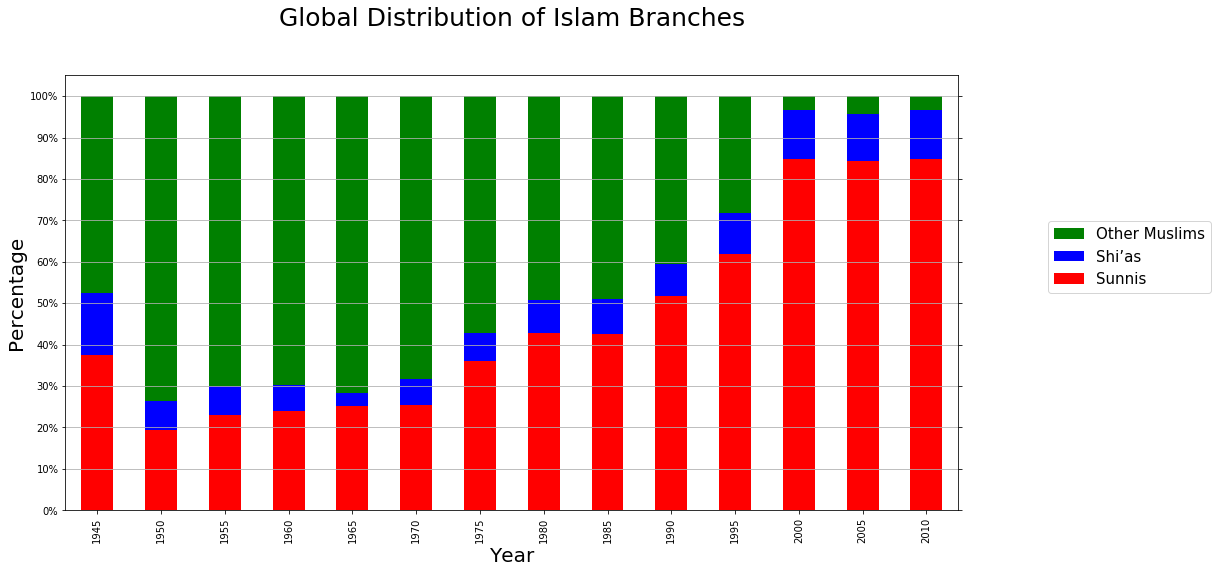

In [40]:
plt.figure(figsize=(16,8))

Global['Sunnis'] = 100*Global['islam_sunni']/ Global['islam_all']
Global['Shi’as'] = 100*Global['islam_shi’a']/ Global['islam_all']
Global['Other Muslims'] = 100 - Global['Sunnis'] - Global['Shi’as']

ax = plt.gca()

Global.plot(x="year", y="Sunnis", kind="bar", ax=ax, color="red")
Global.plot(x="year", y="Shi’as", kind="bar" , bottom= Global["Sunnis"], ax=ax, color='blue')
Global.plot(x="year", y="Other Muslims", kind="bar", bottom= Global["Sunnis"]+ Global["Shi’as"],ax=ax, color="green")

labels=[str(item)+'%' for item in range(0,110,10) ]
ax.set_yticks(list(np.arange(0,110,10)))
ax.set_yticklabels(labels)
ax.yaxis.set_ticks_position('both')
plt.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc=(1.1,.5) ,fontsize= 15)

plt.title('Global Distribution of Islam Branches',y=1.1 ,fontsize = 25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)


plt.show()

##  <font color='blue' size=4> Regional Analysis  </font>

At this stage, we delve into the regional study of religions. Dataset has info about Asia, Africa, the Middle East, Europe, and West Hemisphere. West Hemisphere consists of North America, South America, and Oceania. It has demographic information for periods of 5 years between 1945 and 2010. The regional study could help to see trends with more granularity for making better decisions.

The first diagram is about adherence of Abrahamian religions in last decades. The first one is about Christianity. It shows Middle East does not have a considerable population of Christianity compare to other regions that is obvious. The population of Christians has increased drastically in Africa that is interesting. We could see an increase in the number of new Christians in West Hemisphere that we expect due to growth in population, but it is constant for Europe, so it is better to evaluate percentages. <br>
There is a considerable increase in the Muslim population in Asia, Africa and the Middle East and it shows Islam is really a minor religion in western countries.  <br>
The population of Jewish people is much lower than Christians, and it shows a decrease in Europe and increases in the Middle East after 1950. The primary cause of the enormous rise in the Middle East is developing of Israel.

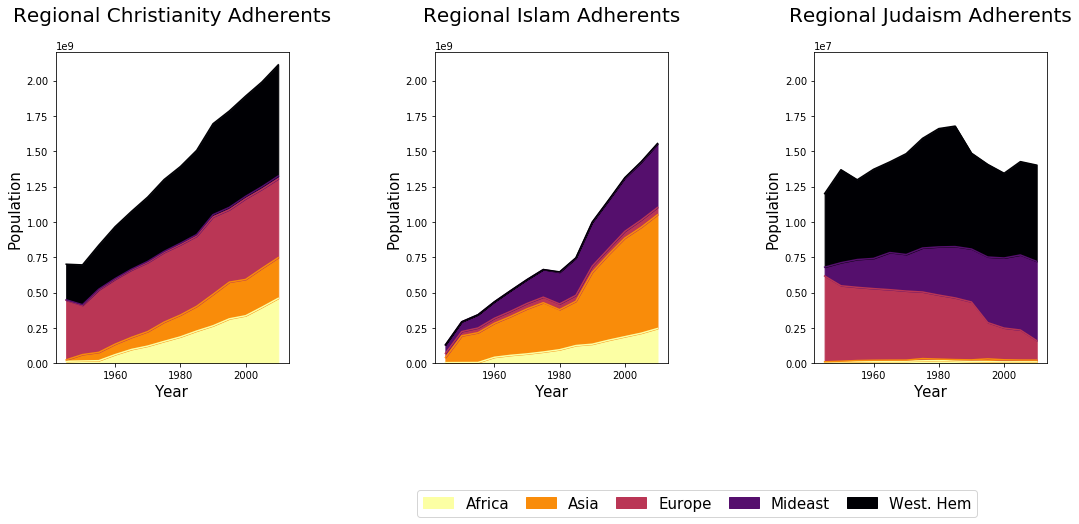

In [41]:
#fig = plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=1, ncols=3)
colormap = plt.cm.inferno_r
#fig = plt.figure(figsize=(20, 10))
#plt.subplot(121)
christianity_population = regional.groupby(['year','region']).christianity_all.sum()
christianity_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0],\
                                       ylim=(0,2.2 * 10**9),figsize=(15,8.5),legend= False )

axes[0].set_title('Regional Christianity Adherents',y=1.08,size=20)
axes[0].set_xlabel('Year' , size= 15)
axes[0].set_ylabel('Population' , size= 15)
 
#plt.subplot(122)
islam_population = regional.groupby(['year','region']).islam_all.sum()
islam_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1],\
                                ylim=(0,2.2 * 10**9),legend= False)
axes[1].set_title('Regional Islam Adherents',y=1.08,size=20)
axes[1].set_xlabel('Year' , size= 15)
axes[1].set_ylabel('Population' , size= 15)

judaism_population = regional.groupby(['year','region']).judaism_all.sum()
judaism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[2] ,ylim=(0,2.2 * 10**7))
axes[2].legend(bbox_to_anchor=(-1.7, -0.5, 2.4, 0.1), loc=10,prop={'size':15},
           ncol=5, mode="expand", borderaxespad=0)
axes[2].set_title('Regional Judaism Adherents',y=1.08,size=20)
axes[2].set_xlabel('Year' , size= 15)
axes[2].set_ylabel('Population' , size= 15)

plt.tight_layout()
plt.show()


Percentage of Abrahamian religions does convery iinteresting information too. We could see adherence percentage of West Hemispherians to Abrahamian faiths did not change considerably but there is a great fall in Europe for all three religions.

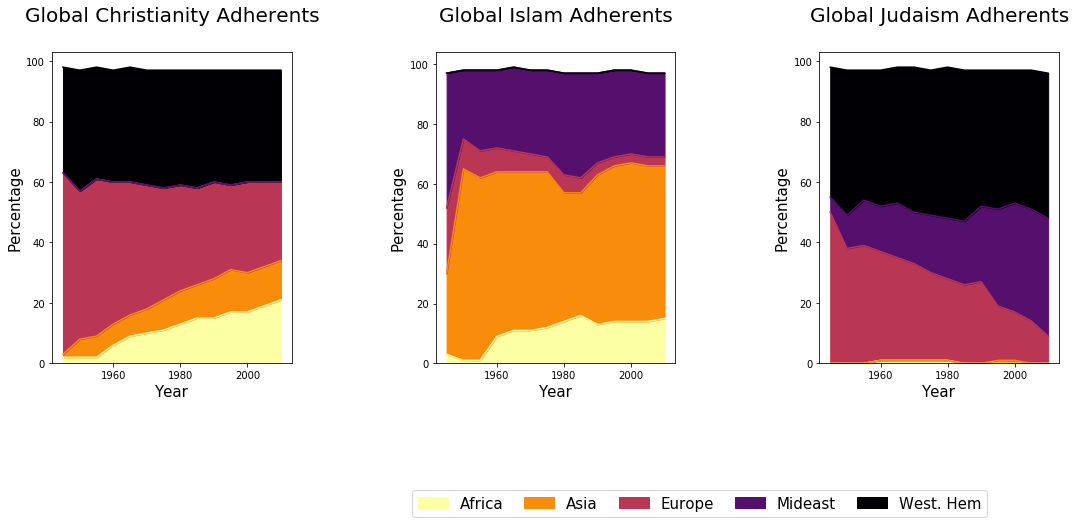

In [42]:

christianity_world=regional.groupby(['year']).christianity_all.sum()
christianity_percentage= regional.groupby(['year','region']).christianity_all.sum()

islam_world=regional.groupby(['year']).islam_all.sum()
islam_percentage= regional.groupby(['year','region']).islam_all.sum()

judaism_world=regional.groupby(['year']).judaism_all.sum()
judaism_percentage= regional.groupby(['year','region']).judaism_all.sum()

for year in range(1945,2015,5):
    christianity_percentage[year] = 100*christianity_percentage[year] / christianity_world[year]
    islam_percentage[year] = 100*islam_percentage[year] / islam_world[year]
    judaism_percentage[year] = 100*judaism_percentage[year] / judaism_world[year]




fig, axes = plt.subplots(nrows=1, ncols=3)
colormap = plt.cm.inferno_r

christianity_percentage.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0], figsize=(15,8.5) ,legend=False)
axes[0].set_title('Global Christianity Adherents',y=1.08,size=20)
axes[0].set_xlabel('Year' , size= 15)
axes[0].set_ylabel('Percentage' , size= 15)
 
islam_percentage.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1], legend= False)
axes[1].set_title('Global Islam Adherents',y=1.08,size=20)
axes[1].set_xlabel('Year' , size= 15)
axes[1].set_ylabel('Percentage' , size= 15)


judaism_percentage.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[2])
axes[2].legend(bbox_to_anchor=(-1.7, -0.5, 2.4, 0.1), loc=10,prop={'size':15},
           ncol=5, mode="expand", borderaxespad=0)
axes[2].set_title('Global Judaism Adherents',y=1.08,size=20)
axes[2].set_xlabel('Year' , size= 15)
axes[2].set_ylabel('Percentage' , size= 15)

plt.tight_layout()
plt.show()


Now it is time to see regional trends for the main non-Abrahamian religions, namely Hinduism, Buddism, Syncretism, and Shinto. It shows these religions are mainly in Asia and there are the small group of people in West Hemisphere that are following guidelines of these religions. It shows enormous progress in Hinduism and Buddism in Asia, but Syncretism and Shinto had slight increases.

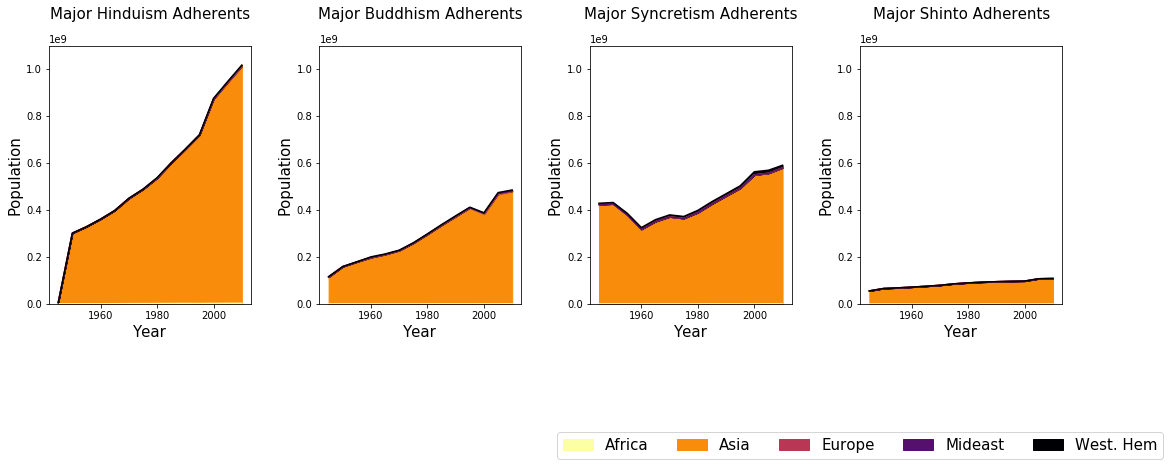

In [43]:

fig, axes = plt.subplots(nrows=1, ncols=4)
colormap = plt.cm.inferno_r

hinduism_population = regional.groupby(['year','region']).hinduism_all.sum()
hinduism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0], \
                                   ylim=(0,1.1 * 10**9), figsize=(15,8.5) ,legend=False)
axes[0].set_title('Major Hinduism Adherents',y=1.08,size=15)
axes[0].set_xlabel('Year' , size= 15)
axes[0].set_ylabel('Population' , size= 15)

buddhism_population = regional.groupby(['year','region']).buddhism_all.sum()
buddhism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1], \
                                  ylim=(0,1.1 * 10**9), legend= False)
axes[1].set_title('Major Buddhism Adherents',y=1.08,size=15)
axes[1].set_xlabel('Year' , size= 15)
axes[1].set_ylabel('Population' , size= 15)

syncretism_population = regional.groupby(['year','region']).syncretism_all.sum()
syncretism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[2],\
                                     ylim=(0,1.1 * 10**9), legend= False )
axes[2].set_title('Major Syncretism Adherents',y=1.08,size=15)
axes[2].set_xlabel('Year' , size= 15)
axes[2].set_ylabel('Population' , size= 15)

shinto_population = regional.groupby(['year','region']).shinto_all.sum()
shinto_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[3] ,ylim=(0,1.1 * 10**9))
axes[3].legend(bbox_to_anchor=(-1.5, -0.6, 3, 0.1), loc=8,prop={'size':15},
           ncol=5, mode="expand", borderaxespad=0)
axes[3].set_title('Major Shinto Adherents',y=1.08,size=15)
axes[3].set_xlabel('Year' , size= 15)
axes[3].set_ylabel('Population' , size= 15)

plt.tight_layout()
plt.show()

Population of non-Abrahamian religious people in Africa, Europe, Middle East and West Hemisphere was not comparable to Asia, so second set of diagrams have been generated for these regions. The most interesting trend is tendency of Africans to Hinduism and tendency of Europeans to Buddhism at first and Hinduism secondly. Additionally there are considerable propensities for West Hemispherians to these religons(especially Syncretism).

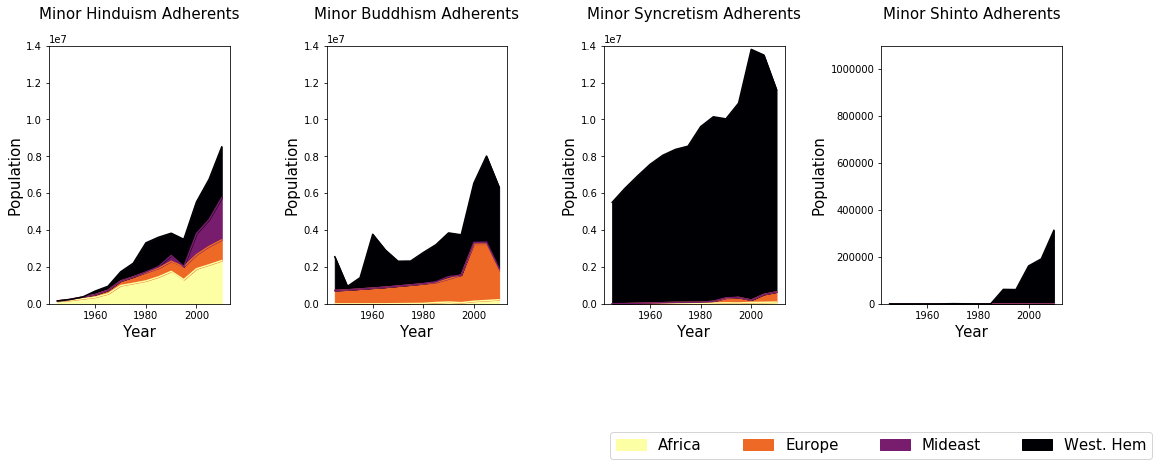

In [44]:
#fig = plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=1, ncols=4)
colormap = plt.cm.inferno_r
#fig = plt.figure(figsize=(20, 10))
#plt.subplot(121)
hinduism_population = regional[regional['region'] != 'Asia'].groupby(['year','region']).hinduism_all.sum()
hinduism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False,ax= axes[0], \
                                   ylim=(0,1.4 * 10**7), figsize=(15,8.5) ,legend=False)
axes[0].set_title('Minor Hinduism Adherents',y=1.08,size=15)
axes[0].set_xlabel('Year' , size= 15)
axes[0].set_ylabel('Population' , size= 15)
 
#plt.subplot(122)
buddhism_population = regional[regional['region'] != 'Asia'].groupby(['year','region']).buddhism_all.sum()
buddhism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[1], \
                                  ylim=(0,1.4 * 10**7), legend= False)
axes[1].set_title('Minor Buddhism Adherents',y=1.08,size=15)
axes[1].set_xlabel('Year' , size= 15)
axes[1].set_ylabel('Population' , size= 15)

syncretism_population = regional[regional['region'] != 'Asia'].groupby(['year','region']).syncretism_all.sum()
syncretism_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[2],\
                                     ylim=(0,1.4 * 10**7), legend= False )
axes[2].set_title('Minor Syncretism Adherents',y=1.08,size=15)
axes[2].set_xlabel('Year' , size= 15)
axes[2].set_ylabel('Population' , size= 15)

shinto_population = regional[regional['region'] != 'Asia'].groupby(['year','region']).shinto_all.sum()
shinto_population.unstack().plot(kind='area',stacked=True,  colormap= colormap, grid=False, ax= axes[3] ,ylim=(0,1.1 * 10**6))
axes[3].legend(bbox_to_anchor=(-1.5, -0.6, 3, 0.1), loc=8,prop={'size':15},
           ncol=5, mode="expand", borderaxespad=0)
axes[3].set_title('Minor Shinto Adherents',y=1.08,size=15)
axes[3].set_xlabel('Year' , size= 15)
axes[3].set_ylabel('Population' , size= 15)

plt.tight_layout()
plt.show()

##  <font color='blue' size=4> Country Level Analysis  </font>

Following word cloud shows countries with more Christians. The Brazil, USA, Congo, Mexico, and Russia are countries with a high population of Christianity in the world.

(-0.5, 399.5, 199.5, -0.5)

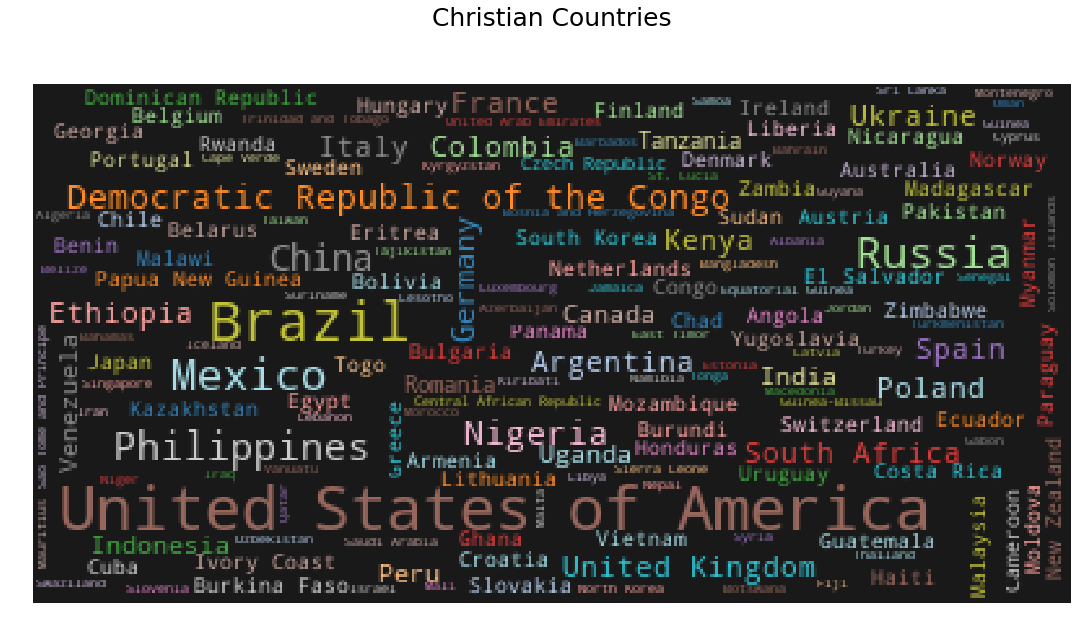

In [45]:
countries=national[(national['year'] == 2010)]['state']

f={}

for country in countries:
    f[country] = national.loc[(national['year'] == 2010) & (national['state']== country),'christianity_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)


wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('Christian Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

Next word cloud shows the main Islamic countries. India, Pakistan, Indonesia, Bangladesh, and Egypt are some of the leading countries with a high population of Muslims. India is in the list too due to the high number of Muslims in spite of other religions same to Hinduism.

(-0.5, 399.5, 199.5, -0.5)

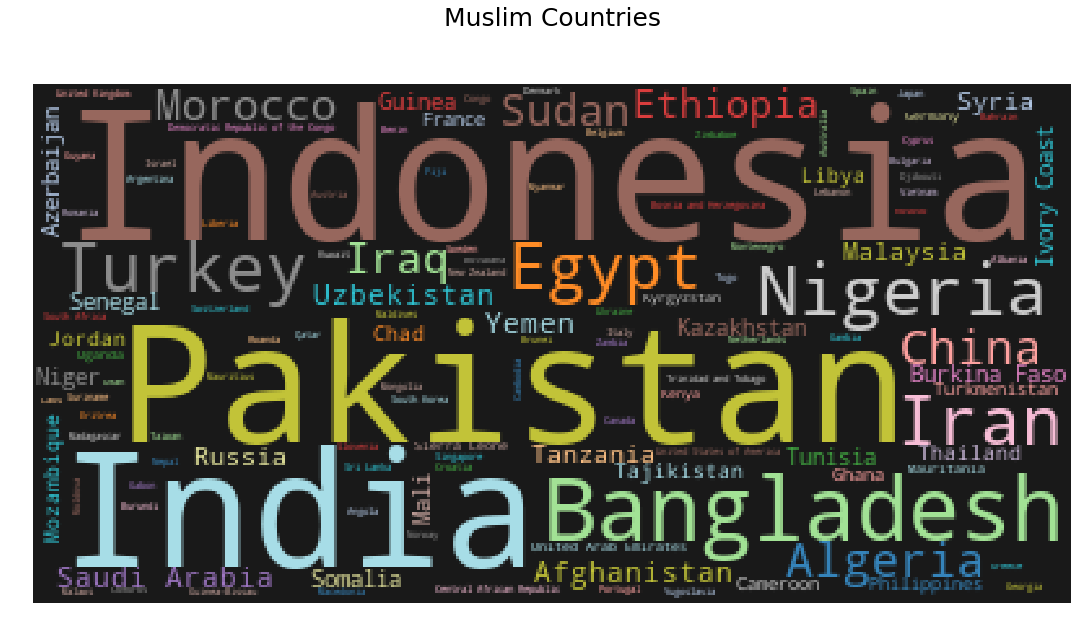

In [46]:
f={}

for country in countries:
    f[country] = national.loc[(national['year'] == 2010)  & (national['state']== country),'islam_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)

wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('Muslim Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

The Next word cloud is for Judaism. It is evident that Israel and the US have a lot of Jewish citizens. After them, there are France, Canada, and Argentia as countries with much adherence to Judaism. 

(-0.5, 399.5, 199.5, -0.5)

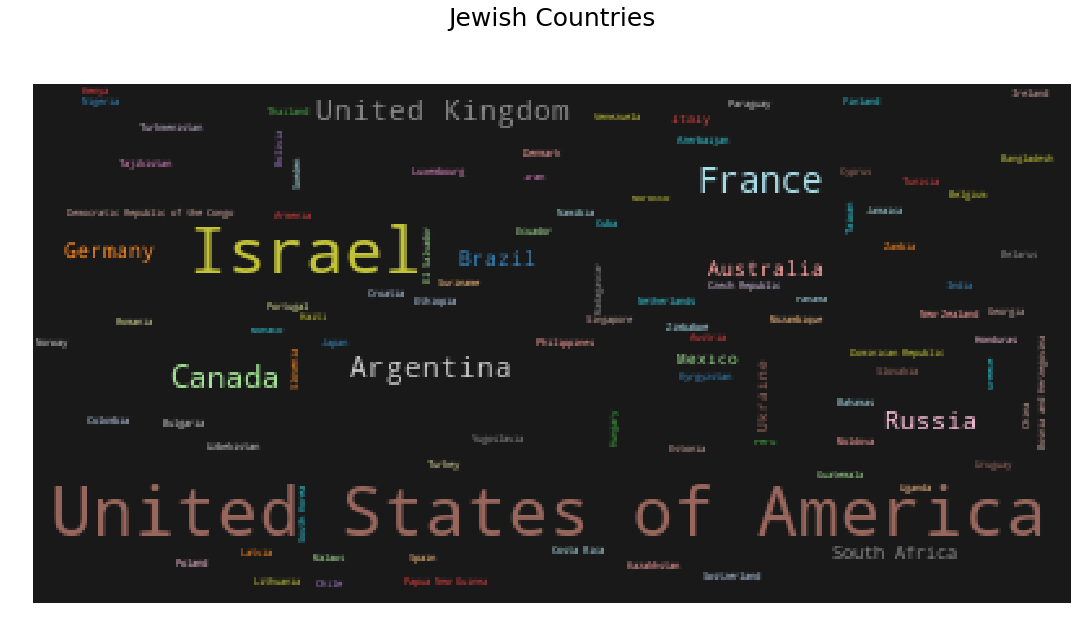

In [47]:
f={}

for country in countries:
    f[country] = national.loc[(national['year'] == 2010) & (national['state']== country),'judaism_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)

wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('Jewish Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

Following word cloud is for Buddhism. China, Japan, Thailand, Myanmar and Vietnam are countries with a majority of Buddhists.

(-0.5, 399.5, 199.5, -0.5)

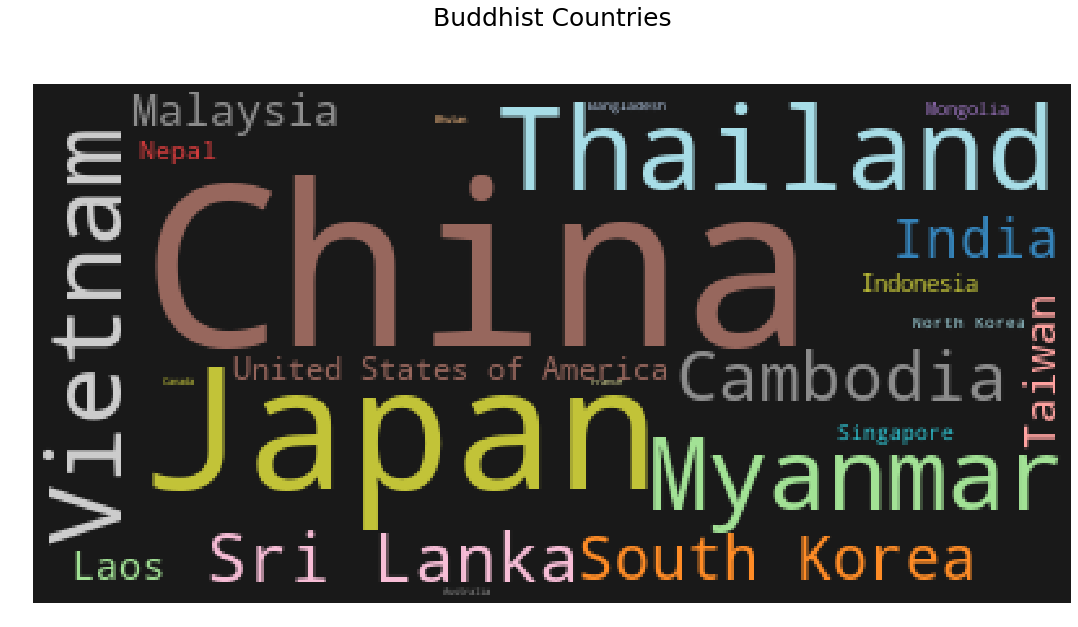

In [48]:
f={}

for country in countries:
    f[country] = national.loc[(national['year'] == 2010) & (national['state']== country),'buddhism_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)

wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('Buddhist Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

The next word cloud shows that India, Bangladesh, and Nepal are the countries with the highest population of Buddhists. It is interesting that the United States of America has a considerable number of Buddhist and Hinduist citizens too.

(-0.5, 399.5, 199.5, -0.5)

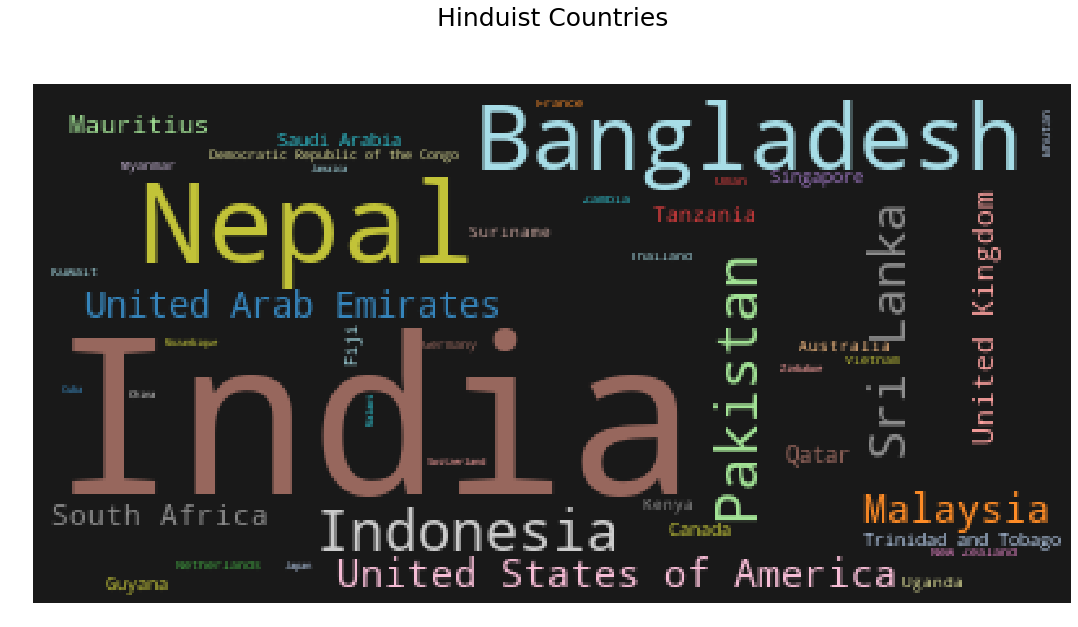

In [49]:
f={}
for country in countries:
    f[country] = national.loc[(national['year'] == 2010) & (national['state']== country),'hinduism_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)

wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('Hinduist Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

Following word cloud is about countries with a high density of syncretist citizens. China, Taiwan, Cuba, Haiti, Indonesia, and the US are main countries with a considerable number of people that believe in Syncretism.

(-0.5, 399.5, 199.5, -0.5)

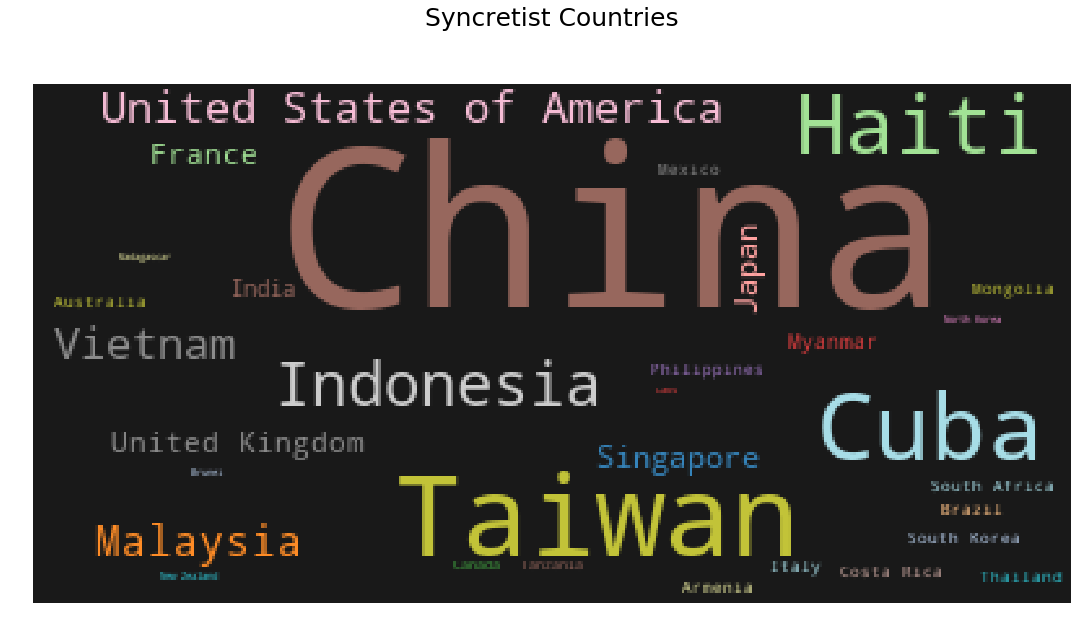

In [50]:
f={}

for country in countries:
    f[country] = national.loc[(national['year'] == 2010) & (national['state']== country),'syncretism_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)


wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('Syncretist Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

The final word cloud is about countries with a high density of non-religion citizens. China, the US, Vietnam, United Kingdom, South/North Korea, and Germany are main countries with people without any Abrahamian or non-Abrahamian religion.

(-0.5, 399.5, 199.5, -0.5)

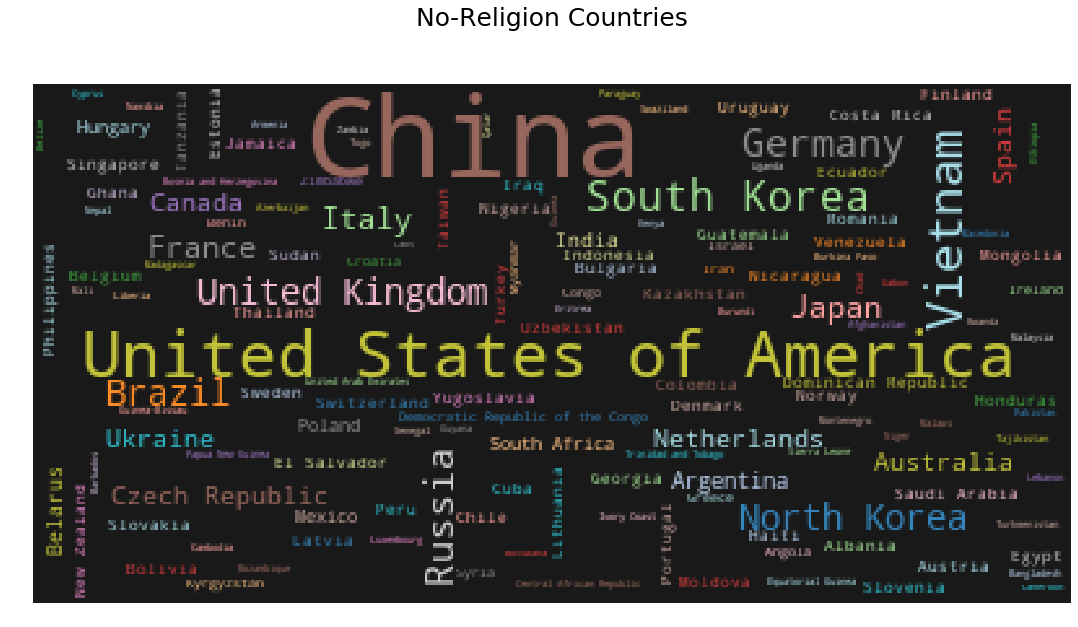

In [51]:

f={}

for country in countries:
    f[country] = national.loc[(national['year'] == 2010) & (national['state']== country),'noreligion_all'].iloc[0]
    
plt.figure(figsize=(25,21))
plt.subplot(211)

wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title('No-Religion Countries',y=1.1 ,fontsize = 25)
plt.axis('off')

You could see the distribution of religions in two leading countries of the US and China. As stated earlier, Christianity is the most popular religion in the United States while Syncretism is the most popular religion in China.It shows that percentage of No-religious people did not have considerable changes in last decades and it approves our statement again.

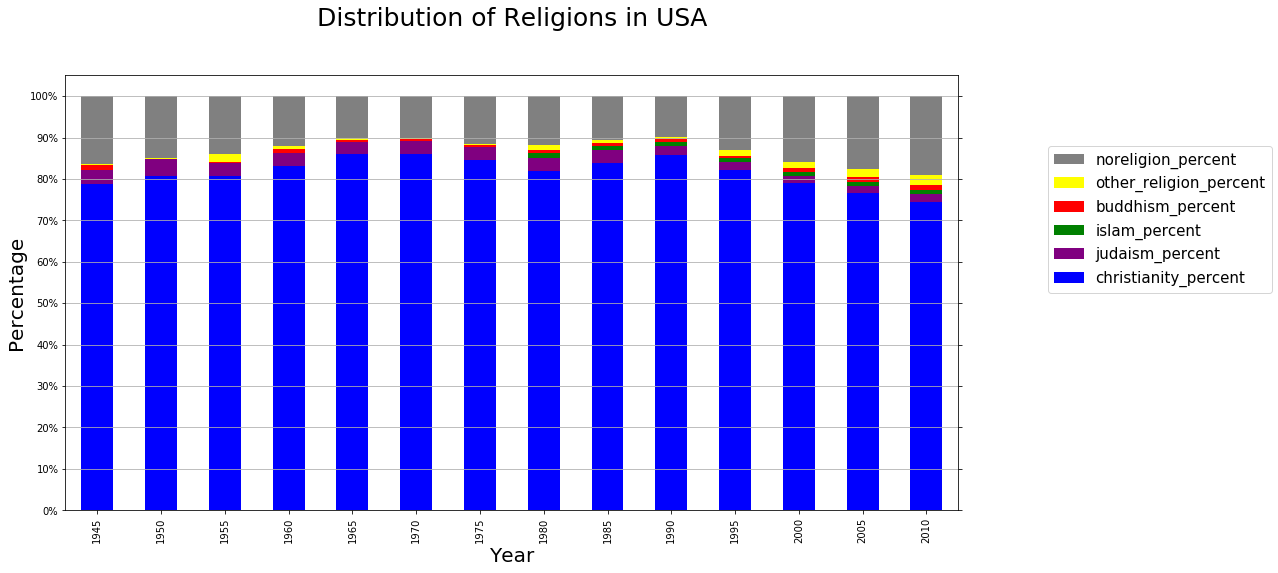

In [52]:
plt.figure(figsize=(16,8))

ax = plt.gca()

usa=national[national['code'] == 'USA']
usa.loc[:,'other_religion_percent'] = 1- usa["christianity_percent"] - \
         usa["judaism_percent"] - usa["islam_percent"] - usa["buddhism_percent"] - usa["noreligion_percent"]

usa.plot(x="year", y="christianity_percent", kind="bar", ax=ax, color="blue")
usa.plot(x="year", y="judaism_percent", kind="bar" , bottom= usa["christianity_percent"], ax=ax, color='purple')
usa.plot(x="year", y="islam_percent", kind="bar" , bottom= usa["christianity_percent"] + \
         usa["judaism_percent"], ax=ax, color='green')
usa.plot(x="year", y="buddhism_percent", kind="bar" , bottom= usa["christianity_percent"] + \
         usa["judaism_percent"] + usa["islam_percent"] , ax=ax, color='red')
usa.plot(x="year", y="other_religion_percent", kind="bar" , bottom= usa["christianity_percent"] + \
         usa["judaism_percent"] + usa["islam_percent"] + usa["buddhism_percent"] , ax=ax, color='yellow')
usa.plot(x="year", y="noreligion_percent", kind="bar", bottom= usa["christianity_percent"] + \
         usa["judaism_percent"] + usa["islam_percent"]+ usa["buddhism_percent"] + \
         usa["other_religion_percent"],ax=ax, color="gray")

labels=[str(item)+'%' for item in range(0,110,10) ]
ax.set_yticks(list(np.arange(0,1.1,.1)))
ax.set_yticklabels(labels)
ax.yaxis.set_ticks_position('both')
plt.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc=(1.1,.5) ,fontsize= 15)


plt.title('Distribution of Religions in USA',y=1.1 ,fontsize = 25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)


plt.show()

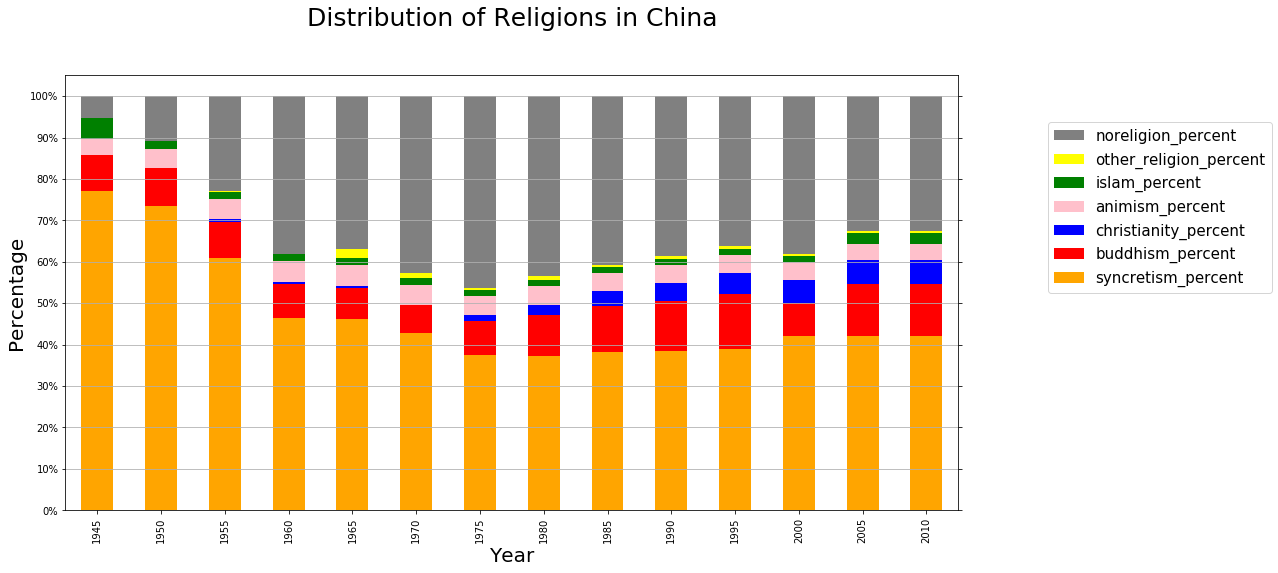

In [53]:
plt.figure(figsize=(16,8))

ax = plt.gca()

chn=national[national['code'] == 'CHN']
chn.loc[: , 'other_religion_percent'] = 1-  chn["syncretism_percent"]-chn["buddhism_percent"] - \
         chn["christianity_percent"] - chn["animism_percent"] - chn["islam_percent"] - chn["noreligion_percent"]


chn.plot(x="year", y="syncretism_percent", kind="bar" , ax=ax, color='orange')
chn.plot(x="year", y="buddhism_percent", bottom= chn["syncretism_percent"] , kind="bar", ax=ax, color="red")
chn.plot(x="year", y="christianity_percent", kind="bar" , bottom= chn["syncretism_percent"] + \
         chn["buddhism_percent"], ax=ax, color='blue')
chn.plot(x="year", y="animism_percent", kind="bar" , bottom= chn["syncretism_percent"] + \
         chn["buddhism_percent"] + chn["christianity_percent"]  , ax=ax, color='pink')
chn.plot(x="year", y="islam_percent", kind="bar", bottom= chn["syncretism_percent"] + \
         chn["buddhism_percent"] + chn["christianity_percent"]+ chn["animism_percent"] , ax=ax, color="green")
chn.plot(x="year", y="other_religion_percent", kind="bar", bottom= chn["syncretism_percent"] + \
         chn["buddhism_percent"] + chn["christianity_percent"]+ chn["animism_percent"] + \
         chn["islam_percent"],ax=ax, color="yellow")
chn.plot(x="year", y="noreligion_percent", kind="bar", bottom= chn["syncretism_percent"] + \
         chn["buddhism_percent"] + chn["christianity_percent"]+ chn["animism_percent"] + \
         chn["islam_percent"] + chn["other_religion_percent"] ,ax=ax, color="gray")


labels=[str(item)+'%' for item in range(0,110,10) ]
ax.set_yticks(list(np.arange(0,1.1,.1)))
ax.set_yticklabels(labels)
ax.yaxis.set_ticks_position('both')
plt.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc=(1.1,.5) ,fontsize= 15)

plt.title('Distribution of Religions in China',y=1.1 ,fontsize = 25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)


plt.show()

##  <font color='blue' size=4> Conclusion  </font>

This report confirmed that in spite of significant progress in technology and media that some people believe it tends to decrease interest of people about religions, humans keep their beliefs to a non-tangible power. For next steps, we could forecast populations of each religion by techniques of time series analysis and show this would be the case in future. There are some claims on decreasing level of beliefs among religious people but it needs data to validation and actually preparing this sort of data by asking from people seems to be very hard.